## Task_02
## Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data ##

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the training dataset
df = pd.read_csv(r"C:\Users\THADAKALURU JASWANTH\Downloads\titanic\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [20]:
# Check for missing values
df.isnull().sum()

# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)


In [21]:
# Encode 'Sex' column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [22]:
# Drop the 'Name', 'Ticket', and 'PassengerId' columns
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [23]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\THADAKALURU JASWANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


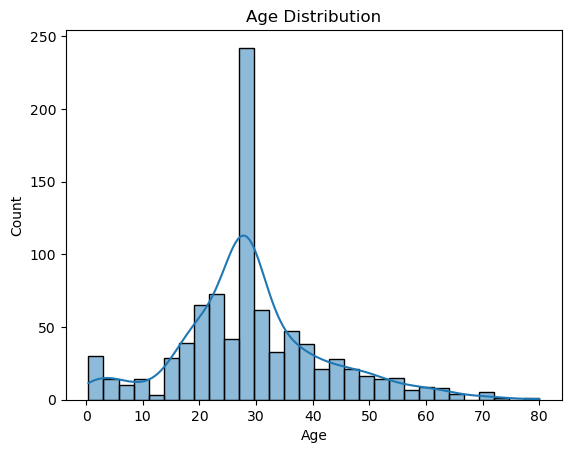

C:\Users\THADAKALURU JASWANTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


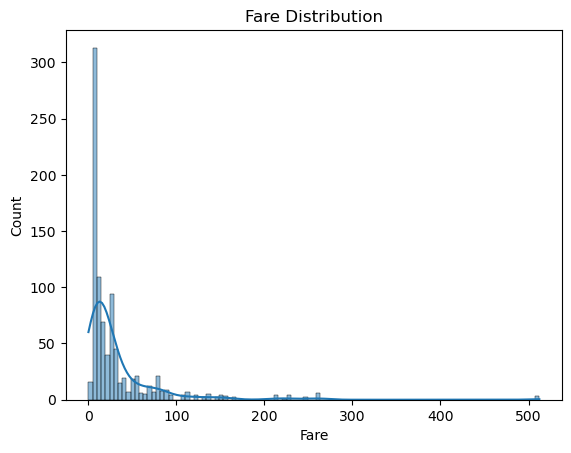

In [24]:
# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()
# Fare distribution
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


## Relationship between variables

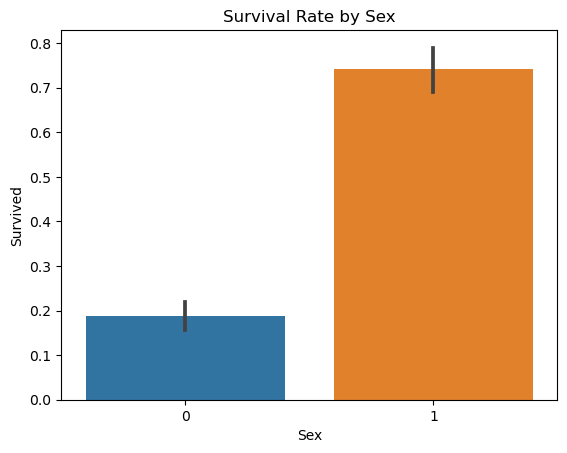

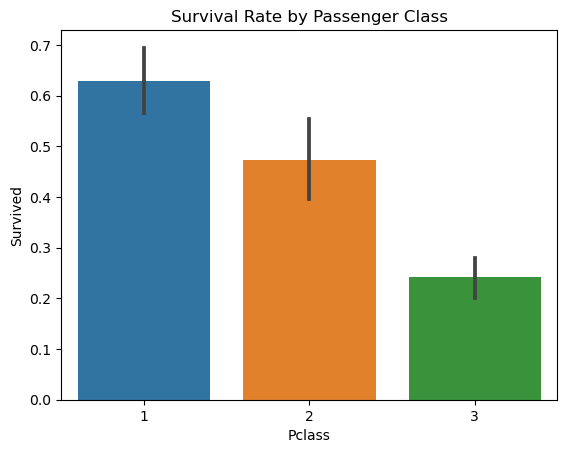

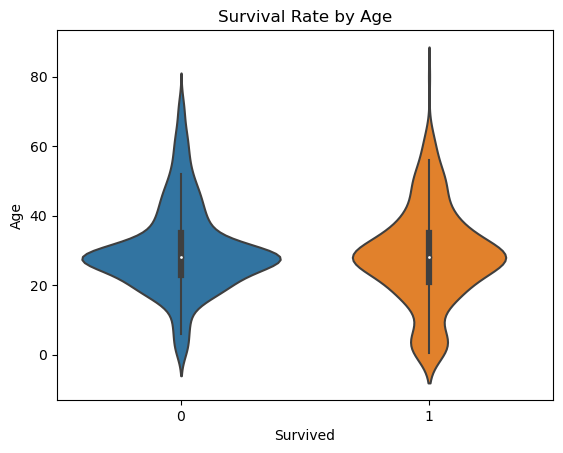

In [25]:
# Survival rate by sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by age
sns.violinplot(x='Survived', y='Age', data=df, split=True)
plt.title('Survival Rate by Age')
plt.show()


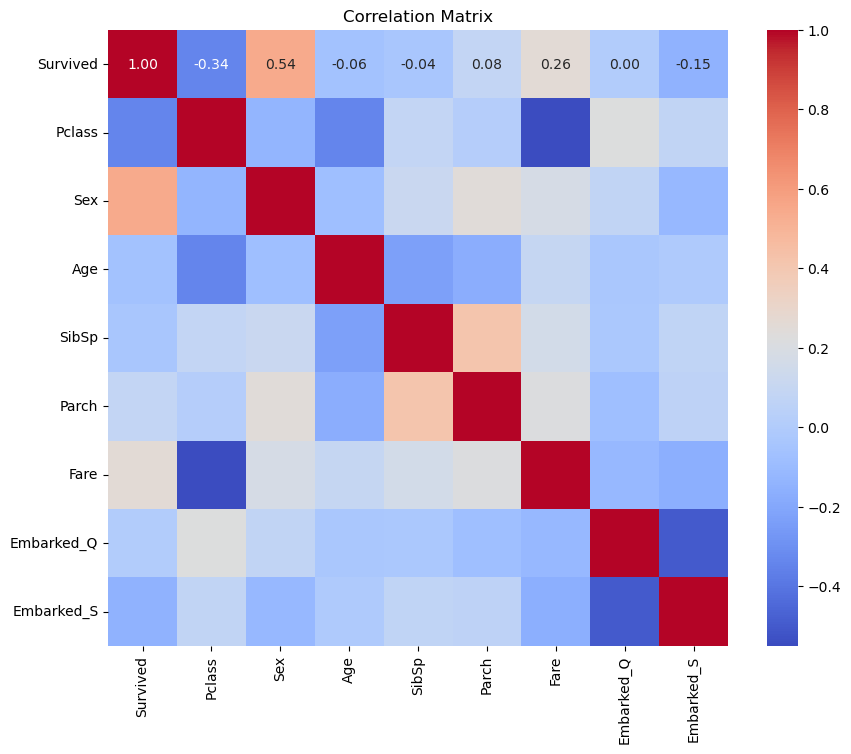

In [26]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
